In [1]:
import pandas as pd

In [2]:
data = pd.ExcelFile('data.xlsx').parse('Лист1')
teachers_dataframe = data.copy()
    
teachers_dataframe = teachers_dataframe.replace(
    ['сenter', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'],
    [1, 2, 3, 4, 5, 6, 7, 8])

teachers_dataframe.columns = ['district', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']

display(teachers_dataframe)

,district,x1,x2,x3,x4,x5,x6
0,Белгородская область,7 777,14 918,2 825,2 009,1 841,1.0
1,Брянская область,4 560,10 211,1 538,1 418,837,NaN
2,Владимирская область,5 802,8 902,1 703,1 468,NaN,1.0
3,Воронежская область,NaN,17 186,3 362,2 458,4 347,1.0
4,Ивановская область,4 495,5 649,1 338,977,1 288,1.0
...,...,...,...,...,...,...,...
80,Амурская область,2 954,7 211,929,977,829,8.0
81,Магаданская область,787,1 215,331,202,97,8.0
82,Сахалинская область,3 332,4 511,792,507,131,8.0
83,Еврейская автономная область,803,NaN,175,187,57,8.0


x1 - Педагогические работники дошкольных образовательных организаций  
x2 - Педагогические работники образовательных организаций общего образования  
x3 - Педагогические работники образовательных организаций дополнительного образования детей  
x4 - Педагогические работники образовательных организаций начального и среднего проффесионального образования  
x5 - Педагогические работники образовательных организаций высшего проффесионального образования

In [3]:
teachers_dataframe.info()
teachers_dataframe.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  85 non-null     object 
 1   x1        83 non-null     object 
 2   x2        84 non-null     object 
 3   x3        84 non-null     object 
 4   x4        84 non-null     object 
 5   x5        83 non-null     object 
 6   x6        84 non-null     float64
dtypes: float64(1), object(6)
memory usage: 4.8+ KB


(85, 7)

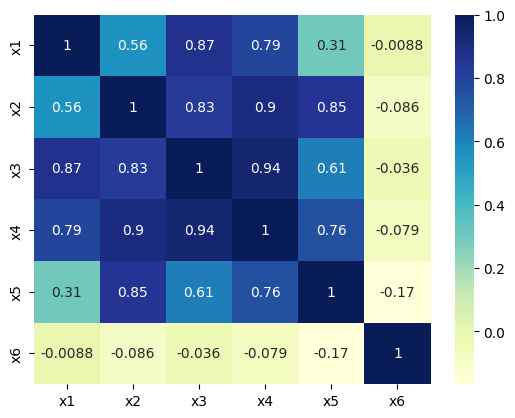

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

teachers_dataframe = teachers_dataframe.replace('\xa0', '', regex=True)
teachers_dataframe = teachers_dataframe.replace('f', '', regex=True) 
teachers_dataframe = teachers_dataframe.replace('d', '', regex=True) 

correlation = teachers_dataframe[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']].corr()

dataplot = sb.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

Составлю тепловую карту пропущенных значений и вычислю среднее значение каждого признака для дальнейшего сравнения.

[7333.084337349397,
 14787.75,
 2519.4285714285716,
 1804.6785714285713,
 2169.9036144578313]

<Axes: >

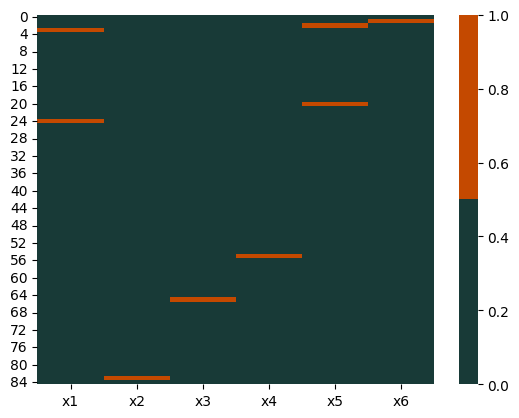

In [5]:
avgs = []
for col in teachers_dataframe.columns[1:-1]:
    avgs.append(teachers_dataframe[col].astype(float, errors='ignore').mean(skipna=True))
display(avgs)

colors = ['#183A37', '#C44900'] 
sb.heatmap(teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']].isnull(), cmap=sb.color_palette(colors))

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=1000, max_iter=100)
train_df = teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']]
train_df.head()

,x1,x2,x3,x4,x5
0,7777,14918,2825,2009,1841
1,4560,10211,1538,1418,837
2,5802,8902,1703,1468,NaN
3,NaN,17186,3362,2458,4347
4,4495,5649,1338,977,1288


In [11]:
imputer.fit(train_df)
imputed_df = imputer.transform(train_df).astype(int)
teachers_dataframe.loc[:, ['x1', 'x2', 'x3', 'x4', 'x5']] = imputed_df
display(teachers_dataframe)

teachers_dataframe.loc[:, ('x6', 1)] = 1.0

,district,x1,x2,x3,x4,x5,x6
0,Белгородская область,7777,14918,2825,2009,1841,1.0
1,Брянская область,4560,10211,1538,1418,837,1.0
2,Владимирская область,5802,8902,1703,1468,1186,1.0
3,Воронежская область,9698,17186,3362,2458,4347,1.0
4,Ивановская область,4495,5649,1338,977,1288,1.0
...,...,...,...,...,...,...,...
80,Амурская область,2954,7211,929,977,829,8.0
81,Магаданская область,787,1215,331,202,97,8.0
82,Сахалинская область,3332,4511,792,507,131,8.0
83,Еврейская автономная область,803,1875,175,187,57,8.0


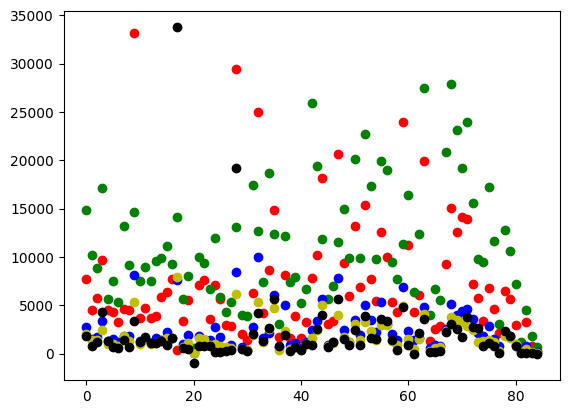

In [27]:
plt.plot(teachers_dataframe.loc[:, ['x1']], 'ro')
plt.plot(teachers_dataframe.loc[:, ['x2']], 'go')
plt.plot(teachers_dataframe.loc[:, ['x3']], 'bo')
plt.plot(teachers_dataframe.loc[:, ['x4']], 'yo')
plt.plot(teachers_dataframe.loc[:, ['x5']], 'ko')
plt.show()

In [ ]:
Наиболее сильно выражены выбросы по первому признаку (x1 – red), второму признаку (x2 – green) и пятому (x5 – black)

/var/folders/5_/zrzd_k4d2t3g0drn18ndb3680000gn/T/ipykernel_53517/1135885534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=teachers_dataframe.loc[:, 'x1'], ax=ax, legend=False, palette="Reds")
/var/folders/5_/zrzd_k4d2t3g0drn18ndb3680000gn/T/ipykernel_53517/1135885534.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=teachers_dataframe.loc[:, 'x2'], ax=ax,legend=False, palette="Greens")
/var/folders/5_/zrzd_k4d2t3g0drn18ndb3680000gn/T/ipykernel_53517/1135885534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=teachers_dataframe

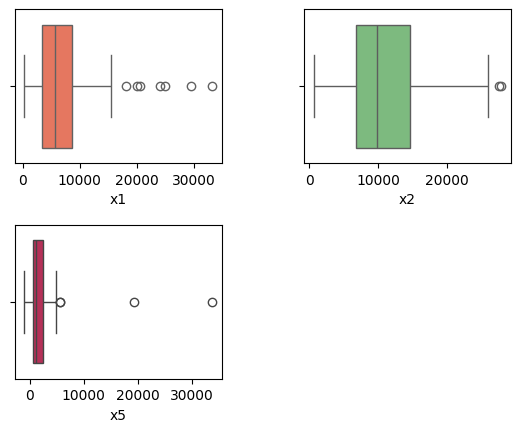

In [46]:
grid = plt.figure()
grid.subplots_adjust(hspace=0.4, wspace=0.4)

ax = grid.add_subplot(2, 2, 1)
sb.boxplot(x=teachers_dataframe.loc[:, 'x1'], ax=ax, legend=False, palette="Reds")

ax = grid.add_subplot(2, 2, 2)
sb.boxplot(x=teachers_dataframe.loc[:, 'x2'], ax=ax,legend=False, palette="Greens")

ax = grid.add_subplot(2, 2, 3)
sb.boxplot(x=teachers_dataframe.loc[:, 'x5'], ax=ax,legend=False, palette="rocket")

plt.show()

Используем изолирующий лес для того, чтобы избавиться от выбросов.

In [49]:

from sklearn.datasets import load_diabetes #импортирование данных
from sklearn.ensemble import IsolationForest

iso = IsolationForest()
y_outliers = iso.fit_predict(teachers_dataframe.loc[:, ['x1', 'x2', 'x5']])

In [50]:
for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        teachers_dataframe.drop(i, inplace = True)

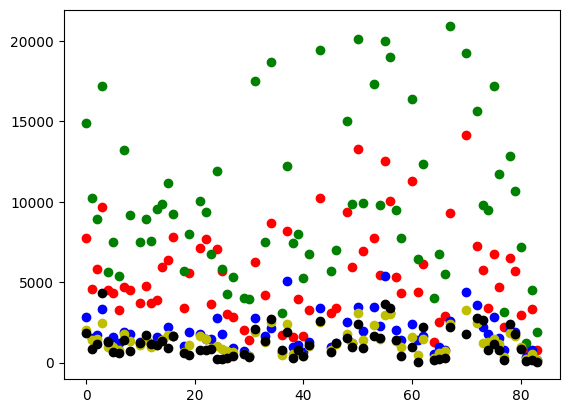

In [52]:
plt.plot(teachers_dataframe.loc[:, ['x1']], 'ro')
plt.plot(teachers_dataframe.loc[:, ['x2']], 'go')
plt.plot(teachers_dataframe.loc[:, ['x3']], 'bo')
plt.plot(teachers_dataframe.loc[:, ['x4']], 'yo')
plt.plot(teachers_dataframe.loc[:, ['x5']], 'ko')
plt.show()

/var/folders/5_/zrzd_k4d2t3g0drn18ndb3680000gn/T/ipykernel_53517/1135885534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=teachers_dataframe.loc[:, 'x1'], ax=ax, legend=False, palette="Reds")
/var/folders/5_/zrzd_k4d2t3g0drn18ndb3680000gn/T/ipykernel_53517/1135885534.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=teachers_dataframe.loc[:, 'x2'], ax=ax,legend=False, palette="Greens")
/var/folders/5_/zrzd_k4d2t3g0drn18ndb3680000gn/T/ipykernel_53517/1135885534.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x=teachers_dataframe

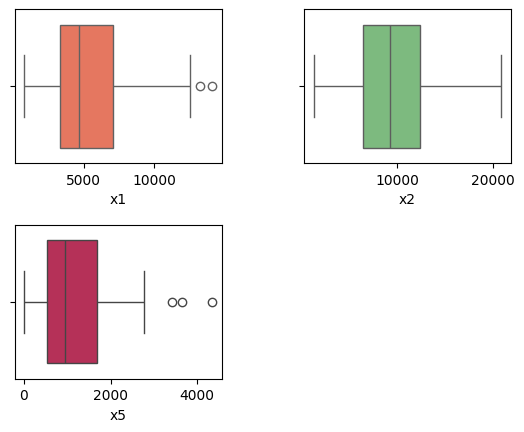

In [53]:
grid = plt.figure()
grid.subplots_adjust(hspace=0.4, wspace=0.4)

ax = grid.add_subplot(2, 2, 1)
sb.boxplot(x=teachers_dataframe.loc[:, 'x1'], ax=ax, legend=False, palette="Reds")

ax = grid.add_subplot(2, 2, 2)
sb.boxplot(x=teachers_dataframe.loc[:, 'x2'], ax=ax,legend=False, palette="Greens")

ax = grid.add_subplot(2, 2, 3)
sb.boxplot(x=teachers_dataframe.loc[:, 'x5'], ax=ax,legend=False, palette="rocket")

plt.show()

Можем заметить, что во втором признаке мы избавились от выбросов, а в первом и пятом минимизировали их количество и приблизили их значения к верхней границе.